<a href="https://colab.research.google.com/github/karthikaijothi/naive-bayes/blob/main/naive_base_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [ ]:
df  = pd.read_csv("/content/card_transdata.csv")

In [ ]:
df.head(10000)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0


In [ ]:
df1=df.head(10000)

In [ ]:
df1.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0
9999,1.292596,0.415847,1.332285,0.0,1.0,0.0,1.0,0.0


In [ ]:
df1.nunique()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

In [ ]:
df1.info

<bound method DataFrame.info of       distance_from_home  distance_from_last_transaction  \
0              57.877857                        0.311140   
1              10.829943                        0.175592   
2               5.091079                        0.805153   
3               2.247564                        5.600044   
4              44.190936                        0.566486   
...                  ...                             ...   
9995            4.225100                        2.678220   
9996            3.614858                        0.431593   
9997           10.131863                       10.262508   
9998           16.306236                        0.014054   
9999            1.292596                        0.415847   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                           1.945940              1.0        1.0   
1                           1.294219              1.0        0.0   
2                           0.427715       

In [ ]:
df1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.374744,4.807107,1.824164,0.879000,0.350800,0.104800,0.641500,0.084100
std,58.811106,22.260124,2.762438,0.326144,0.477244,0.306311,0.479584,0.277552
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.808606,0.305219,0.489052,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.026888,1.006459,1.005754,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.866217,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
df1.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True


In [ ]:
import matplotlib.pyplot as plt


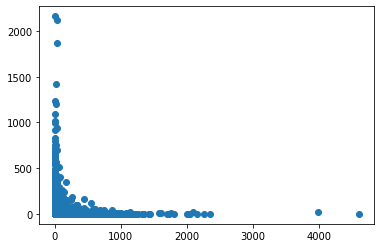

In [ ]:
plt.scatter(df.distance_from_home,df.distance_from_last_transaction)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

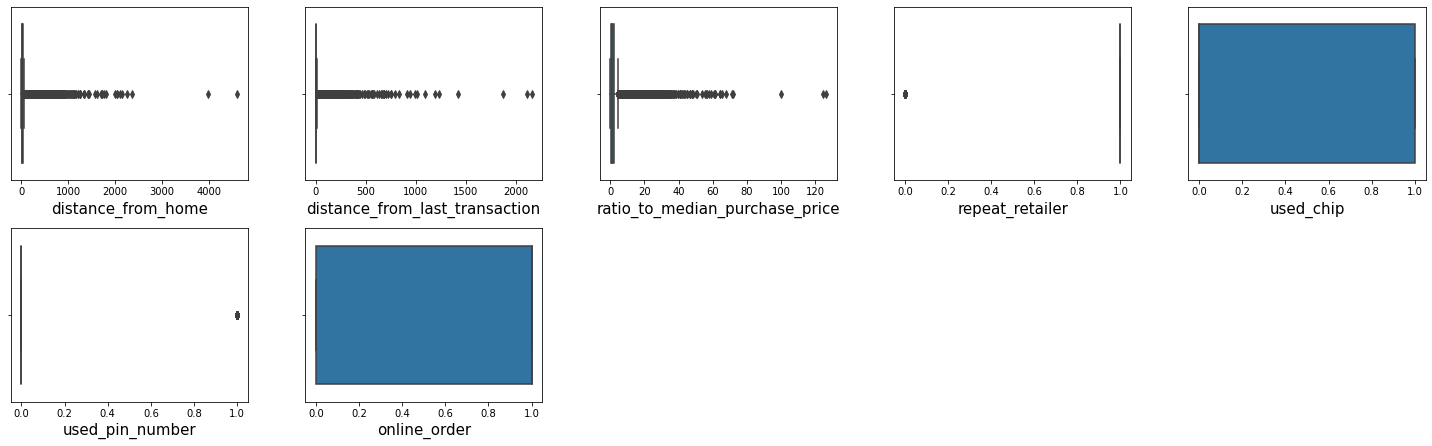

In [ ]:
plt.figure(figsize=(20,15)) 
plotnumber = 1
X=df.drop('fraud',axis=1) 
Y=df['fraud']

for col in X.columns:
    if plotnumber <=8:
      ax=plt.subplot(5,5, plotnumber) 
      sns.boxplot(X[col]) 
      plt.xlabel(col,fontsize=15)

    plotnumber +=1
plt.tight_layout()
plt.show()


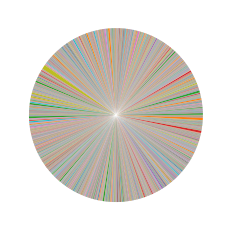

In [ ]:
plt.pie(df1.distance_from_home)
plt.show()

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import confusion_matrix



In [ ]:
df1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       distance_from_home  distance_from_last_transaction  \
0                  False                           False   
1                  False                           False   
2                  False                           False   
3                  False                           False   
4                  False                           False   
...                  ...                             ...   
9995               False                           False   
9996               False                           False   
9997               False                           False   
9998               False                           False   
9999               False                           False   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                              False            False      False   
1                              False            False      False   
2            

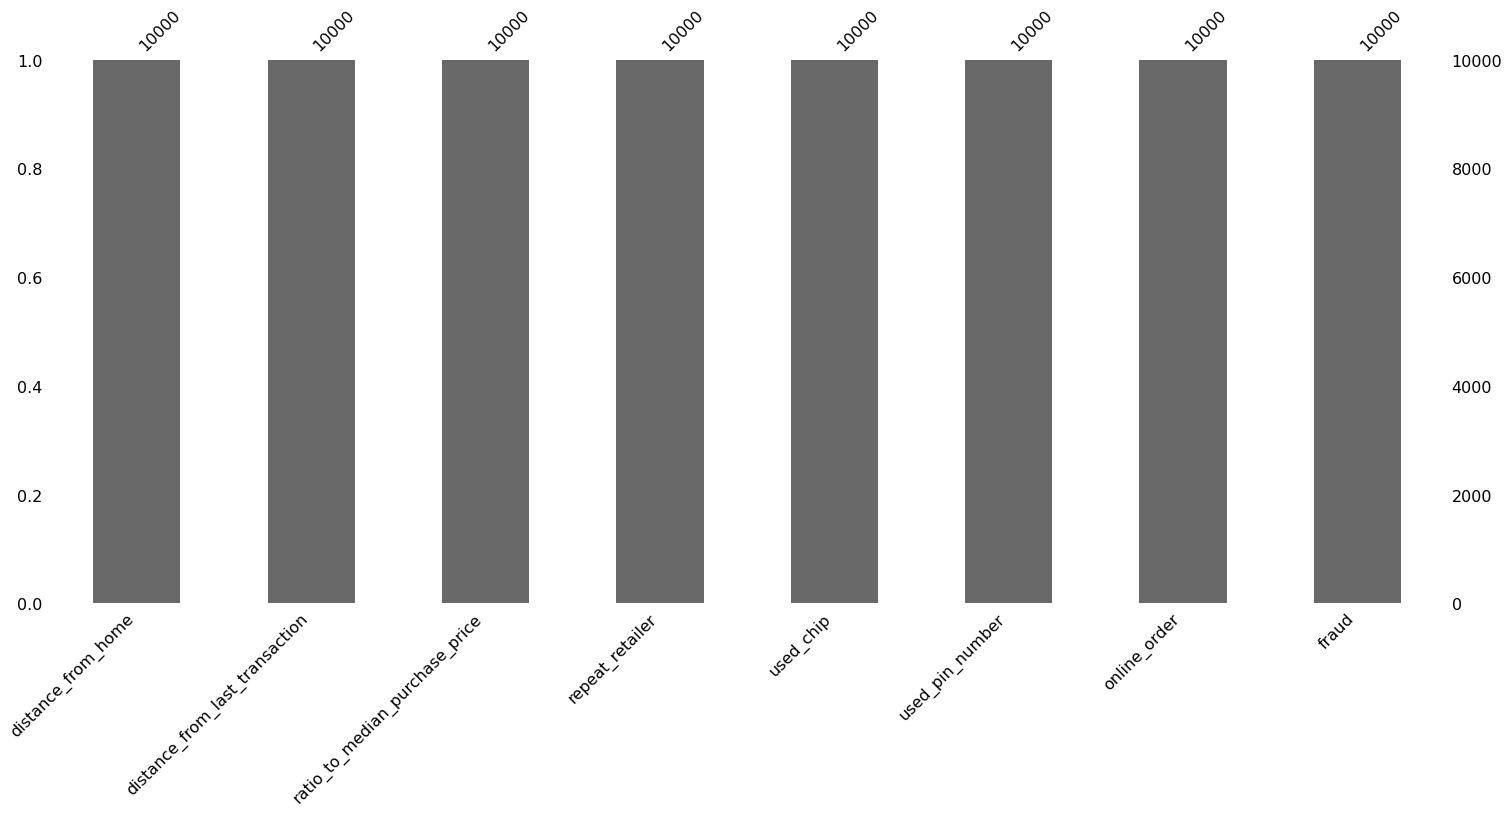

In [ ]:
import missingno as msno

msno.bar(df1)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.25 ,random_state=0) 

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train) 
X_test = a.transform(X_test)

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
 clf = DecisionTreeClassifier(criterion="entropy",random_state=0) 
 clf.fit(X_test,Y_test)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred) 
cm

array([[18855,     0],
       [    0,  1765]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

1.0

In [ ]:
 #naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
clf1= GaussianNB()
clf1.fit(X_test,Y_test)
 

GaussianNB()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.5 ,random_state=5) 

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train) 
X_test = a.transform(X_test)

In [ ]:
Y_pred = clf.predict(X_train)

In [ ]:
cm = confusion_matrix(Y_train,Y_pred)
cm

array([[37578,   102],
       [   75,  3485]])

In [ ]:
accuracy_score(Y_train,Y_pred)

0.9957080504364695